In [1]:
#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Data Import
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Input Data/day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Dimesions of data
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns')

#Check the data type of columns
data.info()

The data has 730 rows and 16 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Find the null values in the data
data.isnull().sum() #Count of missing values in each column
data.isnull().mean()*100  # % of missing value

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [6]:
#data duplicate
data[data.duplicated()].shape[0]

0

In [7]:
#Rename the columns
data.rename(columns={'yr':'year','mnth':'month',
                  'temp':'temperature','hum':'humidity',
                    'dteday':'date','cnt':'count'},inplace=True)


In [8]:
data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#To check unique values of the columns
for cols in ['season','month','weekday','weathersit']:
  print(cols, data[cols].unique())

season [1 2 3 4]
month [ 1  2  3  4  5  6  7  8  9 10 11 12]
weekday [6 0 1 2 3 4 5]
weathersit [2 1 3]


In [10]:
#Data mapping
#mapping the season
data.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'}, inplace=True)

# Mapping month
data.month.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun', 7: 'Jul',
                    8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}, inplace = True)

# Mapping weekday
data.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'}, inplace = True)

# Mapping weathersit
data.weathersit.replace({1:'Clear',2:'Misty',3:'Light_snow'}, inplace = True)

In [11]:
data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
data['count'].mean()

4508.006849315068

In [13]:
# To get stats summary of data
data.describe()

,instant,year,holiday,workingday,temperature,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [14]:
#Univariate Analysis
  #Analysing a single column at a time(without comparing with another).
  #boxplot, 5 num summary
  #data distribution(density plot, histogram)
  #mean, mode

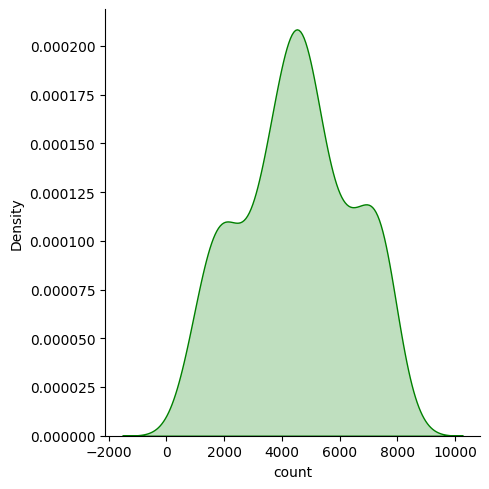

In [15]:
#univariate on target column
sns.displot(data['count'], kind='kde', color='g', fill=True)
plt.show()

In [16]:
#Home Work
#Create displot and boxplot for below
  #Temperature
  #atemp
  #humidity
  #windspeed
#Create count plot for
#Month
#weathersit

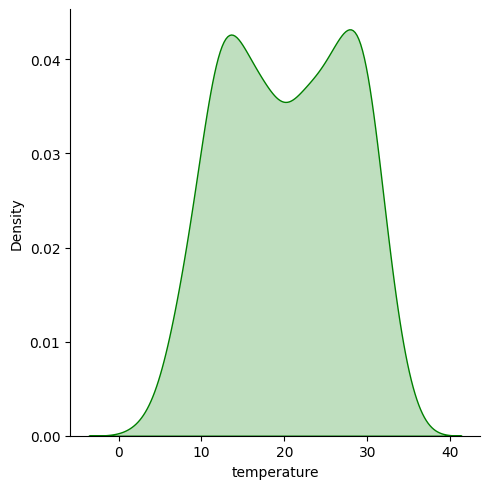

In [17]:
sns.displot(data['temperature'], kind='kde', color='g', fill=True)
plt.show()

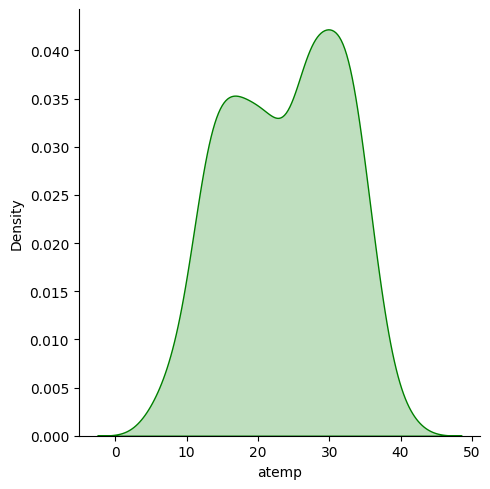

In [18]:
sns.displot(data['atemp'], kind='kde', color='g', fill=True)
plt.show()

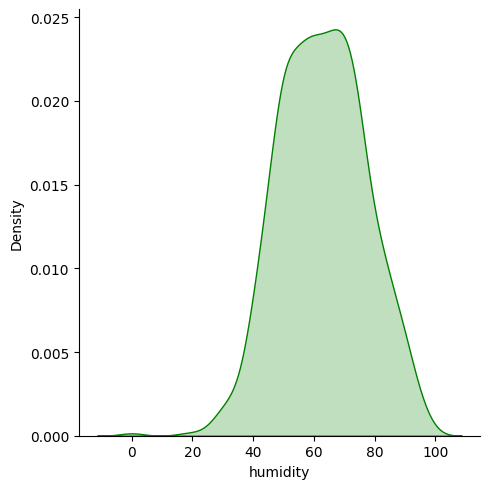

In [19]:
sns.displot(data['humidity'], kind='kde', color='g', fill=True)
plt.show()

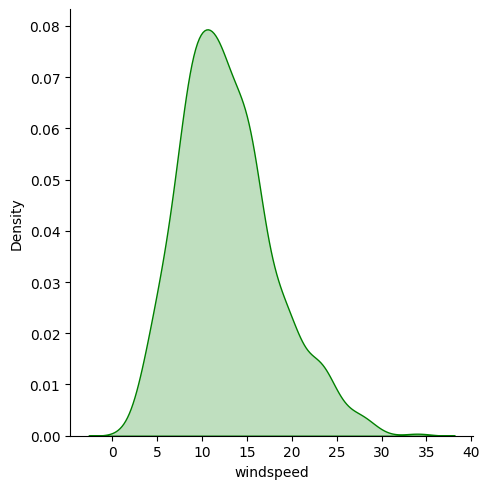

In [20]:
sns.displot(data['windspeed'], kind='kde', color='g', fill=True)
plt.show()

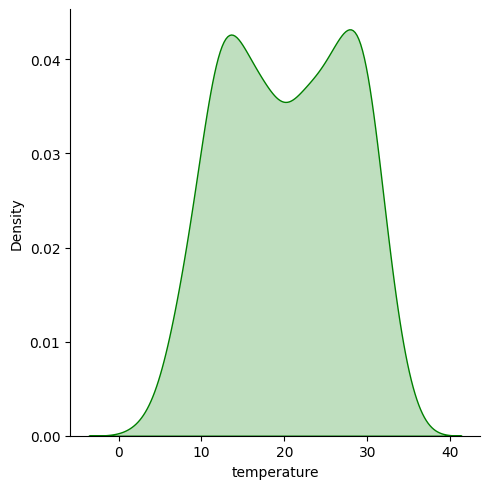

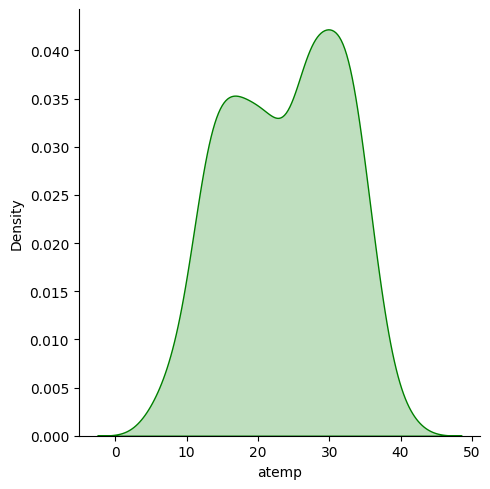

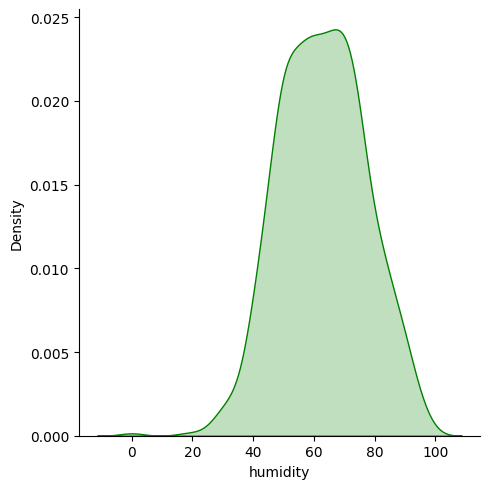

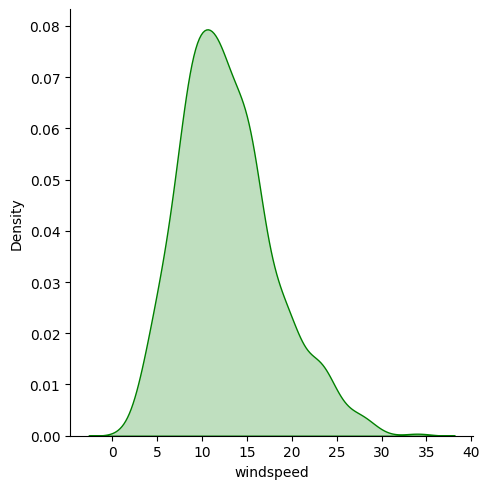

In [21]:
for cols in ['temperature','atemp','humidity','windspeed']:
  sns.displot(data[cols], kind='kde', color='g', fill=True)

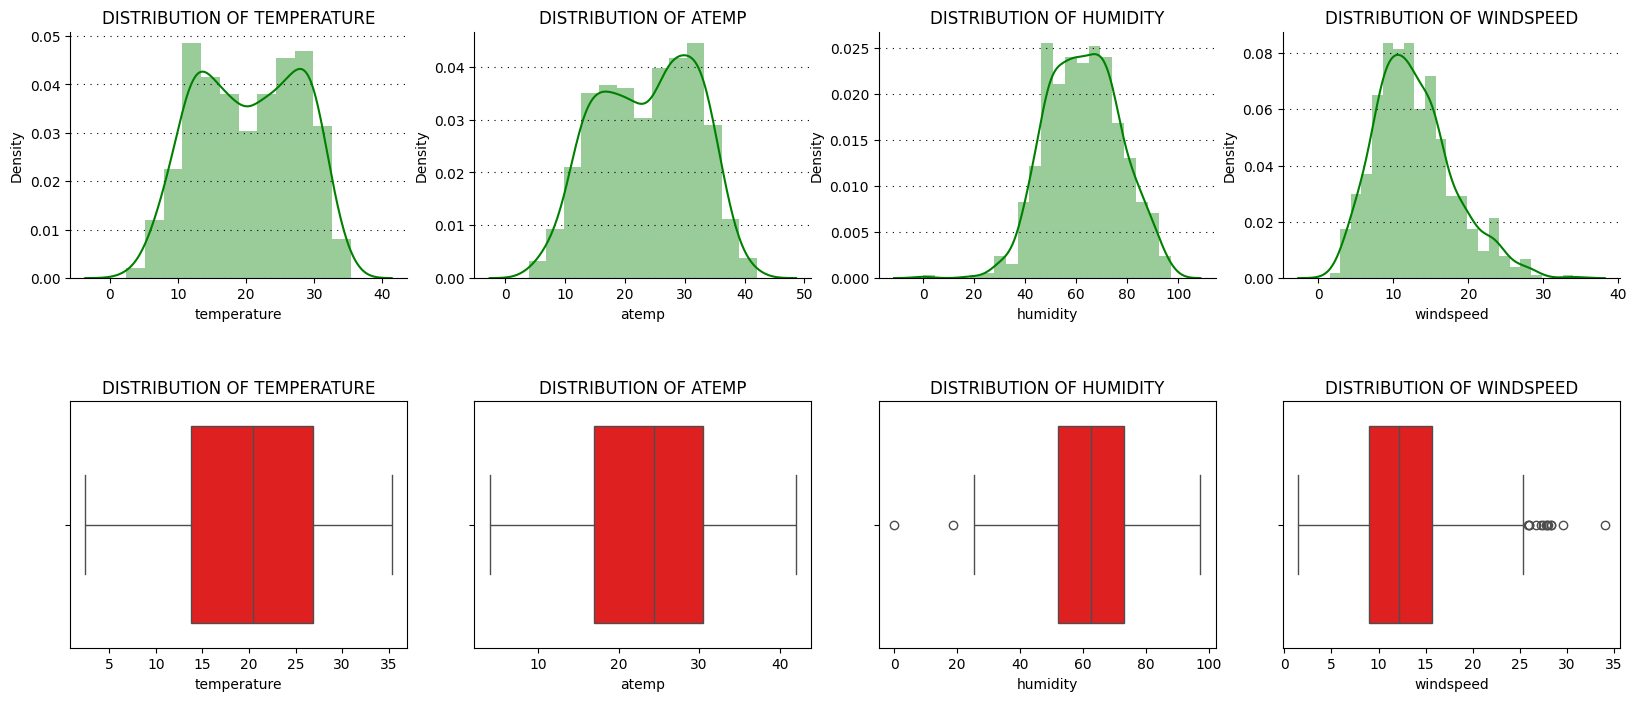

In [22]:
# Creating SubPlots
fig = plt.figure(figsize=(20,8))
spec = fig.add_gridspec(2,4)
spec.update(wspace=0.2, hspace=0.5)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
#Plotting the grapgh
dist_sec = [sec_01,sec_02,sec_03,sec_04]
box_sec = [sec_05,sec_06,sec_07,sec_08]
cnt = 0
for cols in ['temperature','atemp','humidity','windspeed']:
  sns.distplot(data[cols], ax=dist_sec[cnt], color='g')
  dist_sec[cnt].set_title('DISTRIBUTION OF '+ cols.upper())
  dist_sec[cnt].grid(color='black', ls=":",axis='y', dashes=(1,5,))
  sns.boxplot(data[cols], orient='h',ax=box_sec[cnt], color='r')
  box_sec[cnt].set_title('DISTRIBUTION OF '+ cols.upper())
  cnt +=1

  # Removing the spines
  for selection in dist_sec:
    selection.spines['top'].set_visible(False)
    selection.spines['right'].set_visible(False)

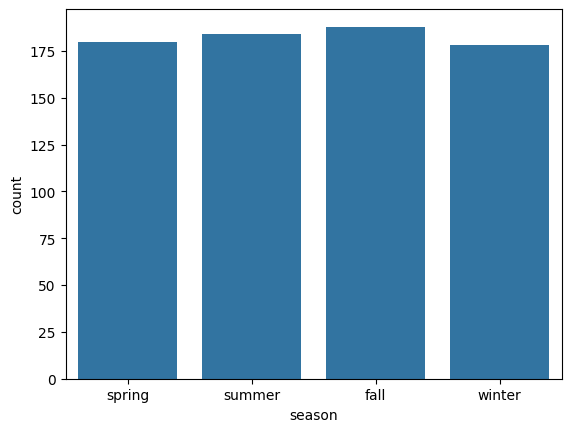

In [23]:
#Univariate on categorical data
sns.countplot(data = data, x='season')
plt.show()

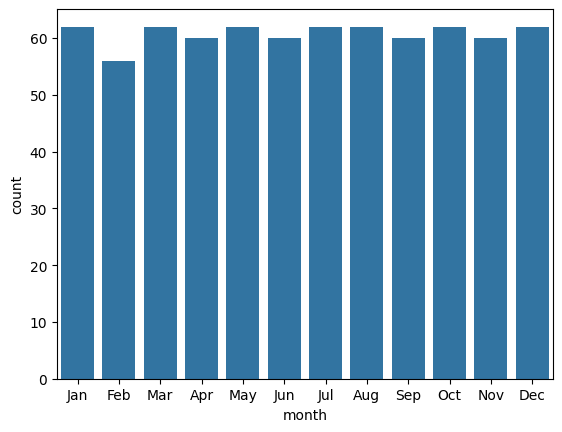

In [24]:
sns.countplot(data = data, x='month')
plt.show()

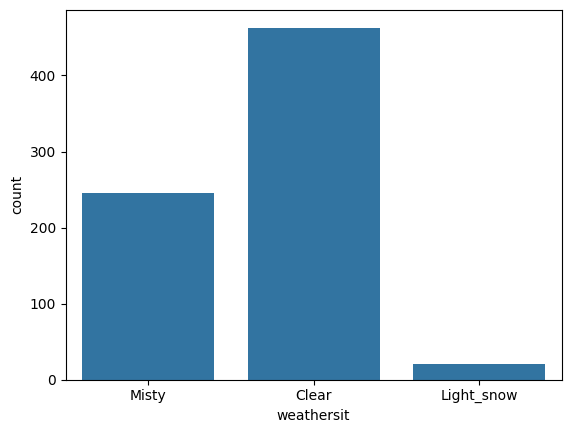

In [25]:
sns.countplot(data = data, x='weathersit')
plt.show()

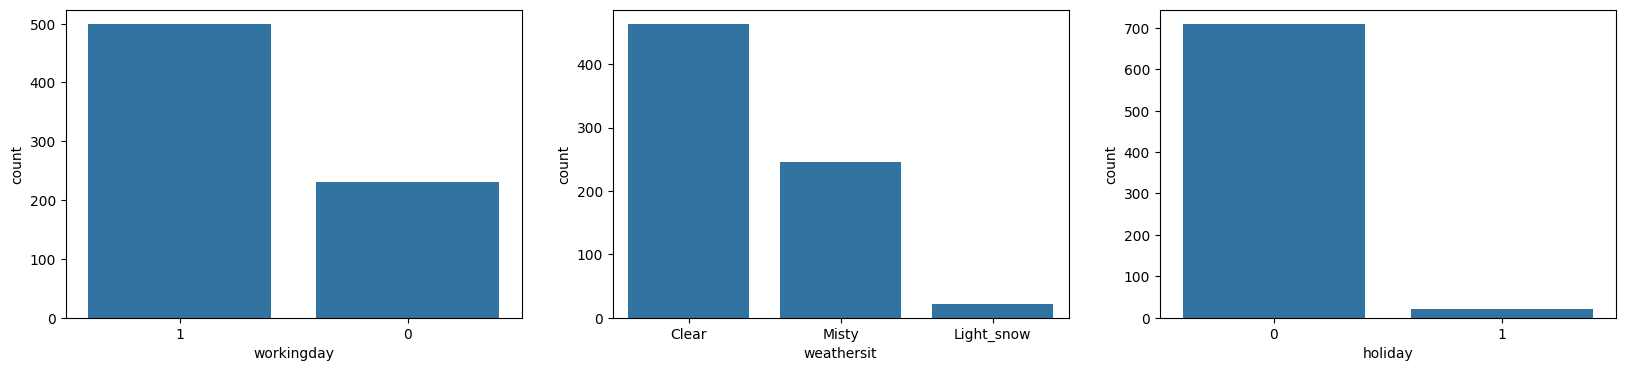

In [26]:
fig = plt.figure(figsize=(20,4))
spec = fig.add_gridspec(1,3)
spec.update(wspace=0.2, hspace=0.5)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])

#Plotting the grapgh
cnt_sec = [sec_01,sec_02,sec_03,sec_04]
cnt=0
for cols in ['workingday','weathersit','holiday']:
  sns.countplot(data, x=cols, ax=cnt_sec[cnt], order=data[cols].value_counts().index)
  cnt+=1

In [27]:
#Bi-Variate Analysis

<Axes: >

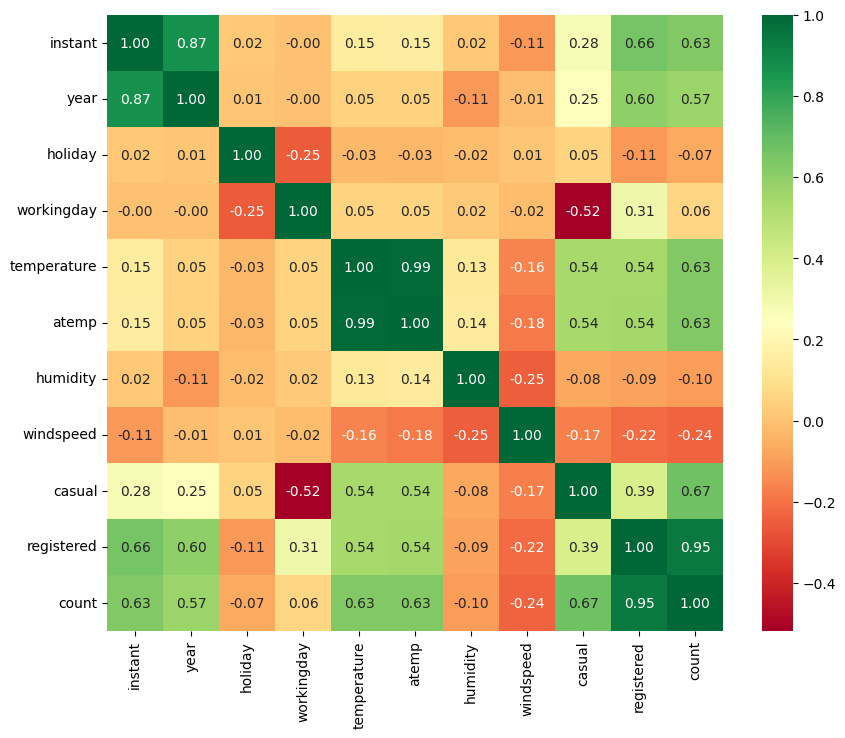

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True),annot=True, cmap='RdYlGn', square=True, fmt='.2f')




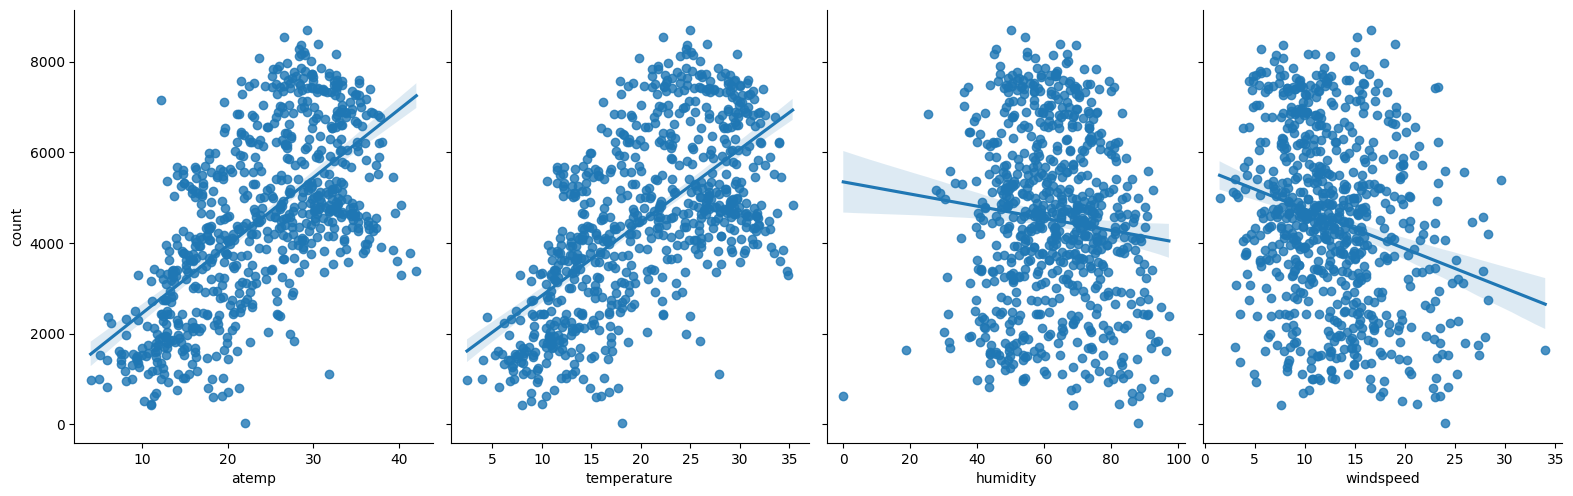

In [29]:
#Continious variable with target
sns.pairplot(data, x_vars=['atemp','temperature','humidity','windspeed'],
             y_vars='count',kind='reg', height=5, aspect=0.8)
plt.show()

In [30]:
# INFERENCE:

# Demand of the rentals high postive correlation with the temperature and atemp.
# Eventhough humidity is scattered around it has little negative correlation with rentals.
# Eventhough windspeed is scattered elsewhere, demand of rental decreases with increase in windspeed.

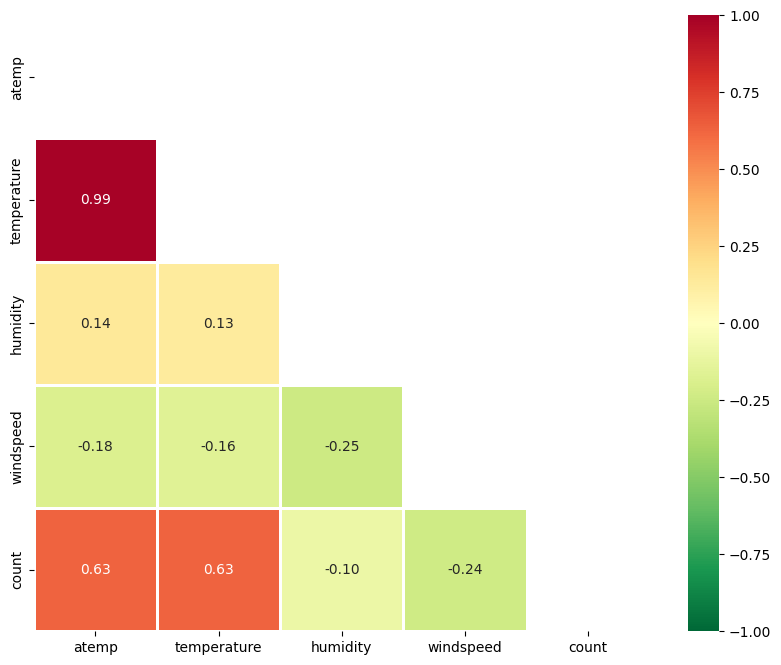

In [31]:
feats = ['atemp', 'temperature', 'humidity', 'windspeed', 'count']
plt.figure(figsize=(10,8))
sns.heatmap(data[feats].corr(),
            annot=True ,
            fmt='.2f',
            vmax=1,
            vmin=-1,
            mask=np.triu(data[feats].corr()),
            linewidths=1,
            linecolor = 'white',
            square=True,
            cmap='RdYlGn_r')

plt.show()